Using Pyro: Construct a 2-component (d=2) GMM (Gaussian mixture model) with two outputs $(x_1,x_2)$ . Each component has the identity matrix $I$  as covariance matrix. The components have means $\mu_1=(1,1), \mu_2=(3,5)$ . The mixing coefficients are $1/2$ . Plot samples (n=500) from this density.

The model should take "n_samples" (integer) as a parameter and return as many samples as specified in that parameter. Hint: Use Pyro's plate object to setup independence and pyro.sample to register distributions.

In [79]:

import torch
import numpy as np
import pandas as pd
import pyro
import pyro.distributions as dist
import matplotlib.pyplot as plt 

In [61]:
parameters = torch.tensor([[1,1], [3,4]])
mix = pyro.distributions.Bernoulli(0.5).sample()

In [101]:
def gaussian_mixture_model(param, n_samples):
    param = param.float()  # Convert param to float
    mix = pyro.sample('mix', pyro.distributions.Bernoulli(0.5).expand([n_samples])) #use expand to get n_samples, conditionally independen
    #all in plate, to make conditionally independent of mix
    with pyro.plate('data', n_samples):
        mean = torch.where(mix.unsqueeze(-1) == 0, param[0], param[1]) #tensor with different means as entries
        mixture = pyro.distributions.MultivariateNormal(mean, torch.eye(2))
        return mixture #return the samples 
    
mixture = gaussian_mixture_model(parameters, 1000)
data = mixture.sample()

In [106]:
print(data.shape) #1000,2
print(mixture.batch_shape) #1000
print(mixture.event_shape) #2 as it is 2dim

torch.Size([1000, 2])
torch.Size([1000])
torch.Size([2])


[(-2.0, 6.0), (-2.0, 7.0)]

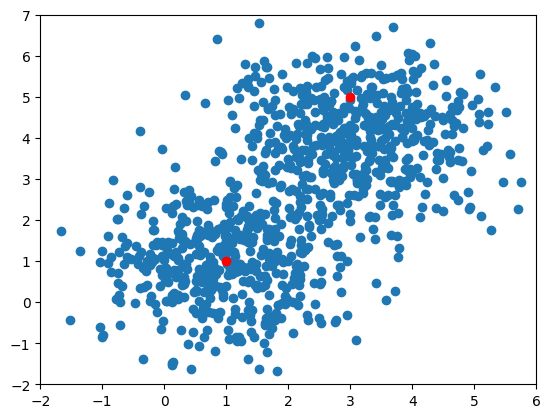

In [98]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(data[:,0],data[:,1])
ax3.scatter(1,1,color='red')
ax3.scatter(3,5,color='red')
ax3.set(xlim=(-2, 6), ylim=(-2,7))